# Machine Learning Engineer Nanodegree 2020
## Capstone Project
Ashish kumar<br>February 18, 2020
## Time Series Analysis of Air Quality Data

## Part 1:  Data Preprocessing

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import math
import glob
import matplotlib.pyplot as plt
%matplotlib inline


## Selecting Best Dataset

The data set includes hourly air pollutants data from 12 nationally-controlled air-quality monitoring sites. So we can choose any of the given monitoring site dataset to work upon. <br><br> Instead of randomly picking any dataset, It is better to look for the null values. Lesser the null values, better will be the predictions.<br><br> Let us build Helper function for finding the best dataset with respect to null values. The idea is to compare the average of col-wise average null values of each multi-site data file

In [2]:
data_path = 'beijing-multisite-airquality-data-set'
# storing names of all datafiles
file_names = [file_name[len(data_path)+1:] for file_name in glob.glob(data_path + '/*.csv')]
for file_name in file_names: print(file_name)

PRSA_Data_Aotizhongxin_20130301-20170228.csv
PRSA_Data_Changping_20130301-20170228.csv
PRSA_Data_Dingling_20130301-20170228.csv
PRSA_Data_Dongsi_20130301-20170228.csv
PRSA_Data_Guanyuan_20130301-20170228.csv
PRSA_Data_Gucheng_20130301-20170228.csv
PRSA_Data_Huairou_20130301-20170228.csv
PRSA_Data_Nongzhanguan_20130301-20170228.csv
PRSA_Data_Shunyi_20130301-20170228.csv
PRSA_Data_Tiantan_20130301-20170228.csv
PRSA_Data_Wanliu_20130301-20170228.csv
PRSA_Data_Wanshouxigong_20130301-20170228.csv


In [3]:
from shutil import copyfile

def best_data_file(data_files, cache_file = ''):
    
    # create directory for storing the dataset
    if not os.path.exists('dataset'):
        os.mkdir('dataset')
    
    if os.listdir('dataset'):
        # read from the cache file
        cache_file = os.listdir('dataset')[0]
        print('Reading from cache file: dataset/',cache_file, sep='')
        return cache_file
    
    # Do the heavy lifting
    best_file = ''
    Min_average = math.inf 
    for file_name in data_files:
        # Reading each datafile in dataframe
        df = pd.read_csv(data_path+'/'+file_name)
        
        # overall average = average of (average of null value col-wise )
        overall_average = df.isna().mean().mean()
        if overall_average < Min_average:
            Min_average = overall_average
            best_file = file_name
        # print(file_name)
        # print(overall_average)
        
        # for visualizing col-wise percentages of null values
        # print(df.isna().mean().round(4)*100)
    
    # copy the best file in the dataset folder
    src = os.path.join(data_path,best_file)
    dst = os.path.join('dataset',best_file)
    copyfile(src,dst)
    print('path created: '+dst)
    return best_file

In [4]:
# test the function
best_file = best_data_file(file_names)

Reading from cache file: dataset/PRSA_Data_Nongzhanguan_20130301-20170228.csv


## Data loading and Preprocesing
#### 1) Loading Data

In [5]:
# load data
df = pd.read_csv(os.path.join(data_path,best_file))
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


#### 2) Indexing Data

For time series analysis, Our data should be indexed as Date-Time. For this we will be using pandas DateTimeIndex function. It is important to note that the Time period of our data is from March 1st, 2013 to February 28th, 2017. Lets verify it before proceeding.

In [6]:
# 1st row
df[:1]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan


In [7]:
# last row
df[df.shape[0]-1:]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35063,35064,2017,2,28,23,10.0,28.0,7.0,48.0,600.0,39.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Nongzhanguan


In [8]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
No         35064 non-null int64
year       35064 non-null int64
month      35064 non-null int64
day        35064 non-null int64
hour       35064 non-null int64
PM2.5      34436 non-null float64
PM10       34624 non-null float64
SO2        34618 non-null float64
NO2        34372 non-null float64
CO         33858 non-null float64
O3         34558 non-null float64
TEMP       35044 non-null float64
PRES       35044 non-null float64
DEWP       35044 non-null float64
RAIN       35044 non-null float64
wd         34986 non-null object
WSPM       35050 non-null float64
station    35064 non-null object
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Since the columns year, month, day and hour didn't contain any null value, So we can use pandas DateTimeIndex function with start date-time as 2013-03-01 00:00:00 and end date-time as 2017-02-28 23:00:00. As our dataset contains hourly data so we can use freq as 'H' which stands for Hour.

In [9]:
# creating Date-Time index column
df['Date-Time'] = pd.DatetimeIndex(start = '2013-03-01 00:00:00',end = '2017-02-28 23:00:00',freq ='H')
# setting index as Date-Time
df.set_index('Date-Time', drop = True, inplace = True)

In [10]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
Date-Time,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
2013-03-01 01:00:00,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2013-03-01 02:00:00,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
2013-03-01 03:00:00,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


#### 3) Removing unwanted columns

Since we are intrested in time-series analysis of air pollutants We should remove unwanted columns.
The six major air-pollutants are:
1) PM2.5
2) PM10
3) SO2
4) NO2
5) CO
6) O3
<br>Rest of the columns need to be ommited


In [11]:
wanted_col = ['PM2.5','PM10','SO2','NO2','CO','O3']
df = df[wanted_col]

In [12]:
df.head()

,PM2.5,PM10,SO2,NO2,CO,O3
Date-Time,,,,,,
2013-03-01 00:00:00,5.0,14.0,4.0,12.0,200.0,85.0
2013-03-01 01:00:00,8.0,12.0,6.0,14.0,200.0,84.0
2013-03-01 02:00:00,3.0,6.0,5.0,14.0,200.0,83.0
2013-03-01 03:00:00,5.0,5.0,5.0,14.0,200.0,84.0
2013-03-01 04:00:00,5.0,5.0,6.0,21.0,200.0,77.0


#### 4) Handling Null values

We can handle null values for Time-series data using the following ways:<br>
##### By simply dropping
<br>We can simply drop the rows containing null values. But dropping null values is not always a good choice. We could miss important data points necessary for predictions. A better way is imputing values intead of dropping.<br>
##### By imputing values
<br>
<b>1) using mean </b><br> We can replace null values with mean value by particular month, year or the entire column. This may not be the best choice always especially if we are going to make several short and long time-series <br><br>
<b>2) using foreward fill</b><br> We can use pandas ffill() method for filling null values with next row not null value<br><br>
<b>3) using backward fill</b><br> We can use pandas bfill() method for filling null values with previous row not null value<br><br>
<b>4) using Interpolation </b><br>We can use Interpolate method of pandas to fill values according to different methods.<br>
I will be using linear Interpolate method which will fill null values with linear transition.  

In [13]:
# let us check column-wise null values: before
df.isnull().sum()

PM2.5     628
PM10      440
SO2       446
NO2       692
CO       1206
O3        506
dtype: int64

In [14]:
# let us apply interpolation
cleaned_df = df.interpolate()

In [15]:
# column-wise null values: after
cleaned_df.isnull().sum()

PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
dtype: int64

In [16]:
# remove dataframes that are no longer required to save memory
del df

Now we will create six data frames for the pollutants PM2.5, PM10, SO2, NO2, CO and O3 for Time-Series analysis.

In [57]:
# creating data-frame for PM2.5
df_PM25 = cleaned_df[['PM2.5']]
# creating data-frame for PM10
df_PM10 = cleaned_df[['PM10']]
# creating data-frame for SO2
df_SO2 = cleaned_df[['SO2']]
# creating data-frame for NO2
df_NO2 = cleaned_df[['NO2']]
# creating data-frame for CO
df_CO = cleaned_df[['CO']]
# creating data-frame for O3
df_O3 = cleaned_df[['O3']]

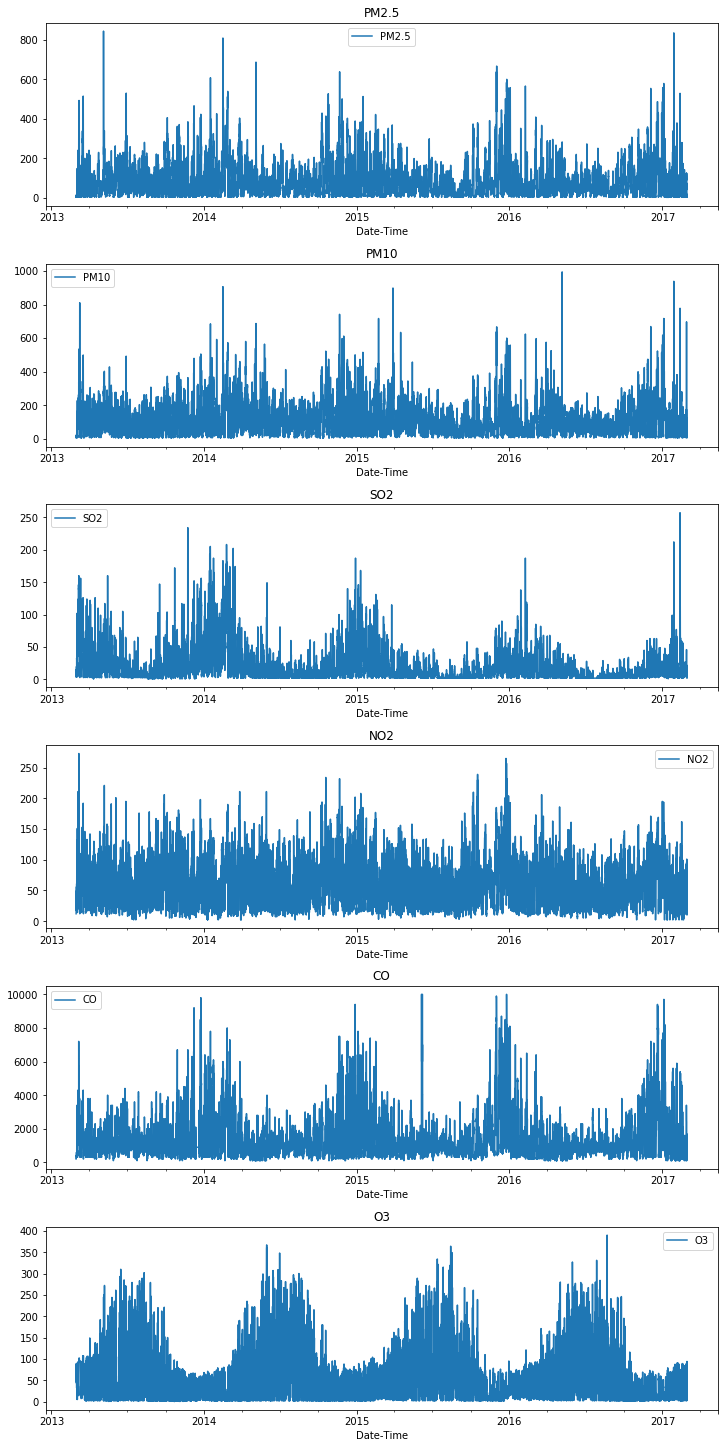

In [18]:
# let us visualize our created dataframes
df_list = [df_PM25, df_PM10, df_SO2, df_NO2, df_CO, df_O3]
fig, axes = plt.subplots(nrows = 6, ncols = 1, constrained_layout = True)
[df_list[i].plot(ax = axes[i], figsize = (10,20), title = df_list[i].columns[0]) for i in range(len(df_list))]

Now it's time to split our time series data into Train and Test sets.<br><br> '***' It's important to note that we can't randomly split our data into train-test sets like other machine learning tasks like classification etc. This is because, we need data in sequential order with respect to time.'***' <br><br> Recall that the Time-period of our data was from March 1st, 2013 to February 28th, 2017. <br>Now it completely depends on us to either make several weekly or monthly short time series(Train-Test sets) to predict data hourly or weekly. Or we can make a long time series(say a yearly time series of Train-Test data) to predict data for several months. Since we have the plenty of data I will proceed with later-choice.<br><br>
Before splitting our data lets take a deep look at our data. Let's see PM2.5 data.

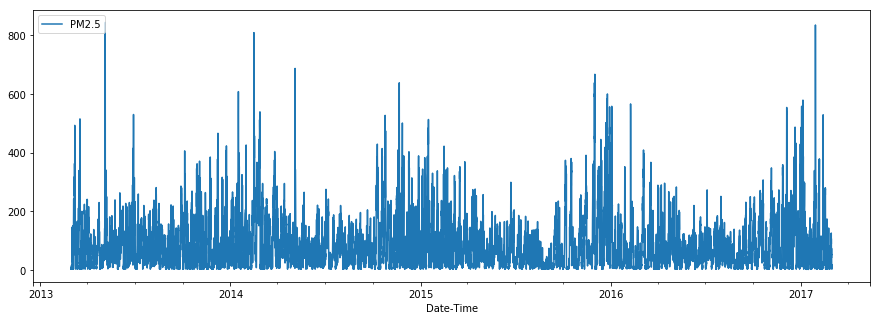

In [19]:
# plotting PM2.5 data
df_PM25.plot(figsize=(15,5))

That's a lot of data to see. This is because the data is collected hourly. Let's take a look over 1st-day data.

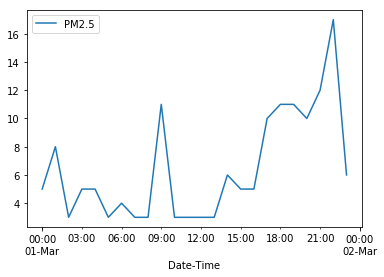

In [20]:
# plotting 1st day 24 hour data
df_PM25[:24].plot()

 #### Resampling data to 'Daily' and 'Monthly' from 'Hourly'
 Since we are going to make a long time series its better to resample our data from Hourly to Daily and Monthly.
 We will use pandas time series tools to resample points at frequency like every day ('D') or start month ('MS'), etc.

In [58]:
# function for resampling each dataframe based on frequency
def resample_data(dfs, freq = 'D'):
    '''
        dfs: list of dataframes
        freq: frequency for resampling data, 'D' for Day
        return: list of resampled dataframes
        
        Note: 1) if freq is 'D' then resampling is done by taking average of hours.
              2) if freq is 'MS' then resampling is done by taking monthly average
                 of maximum values in a day
    
    '''
    if freq == 'D':
        return [each_df.resample(freq).mean() for each_df in dfs] 
    else:
        return [each_df.resample('D').max().resample(freq).mean() for each_df in dfs]

In [59]:
# df_list = [df_PM25, df_PM10, df_SO2, df_NO2, df_CO, df_O3
# Resampling dataframes by daily
df_PM25, df_PM10, df_SO2, df_NO2, df_CO, df_O3 = resample_data(df_list)

# Resampling dataframes by monthly
dfm_PM25, dfm_PM10, dfm_SO2, dfm_NO2, dfm_CO, dfm_O3 = resample_data(df_list, freq = 'MS')

# updating df_list of daily pollutants
df_list = [df_PM25, df_PM10, df_SO2, df_NO2, df_CO, df_O3]

# creating dfm_list for monthly pollutants
dfm_list = [dfm_PM25, dfm_PM10, dfm_SO2, dfm_NO2, dfm_CO, dfm_O3]

In [60]:
# lets us see the change in frequency from Hourly to Daily
df_PM25.head()

,PM2.5
Date-Time,
2013-03-01,6.458333
2013-03-02,28.750000
2013-03-03,104.750000
2013-03-04,22.875000
2013-03-05,131.833333


In [61]:
# lets us see the change in frequency from Hourly to Monthly
dfm_PM25.head()

,PM2.5
Date-Time,
2013-03-01,106.770161
2013-04-01,57.350000
2013-05-01,77.247312
2013-06-01,108.320139
2013-07-01,75.435484


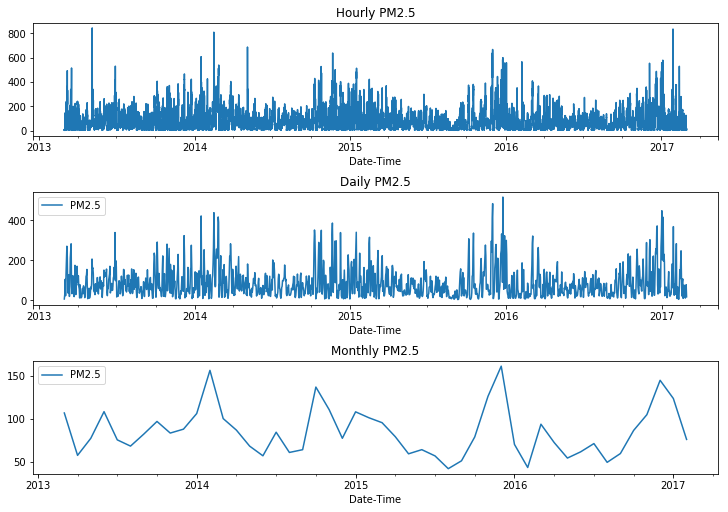

In [81]:
# let us quickly compare hourly, daily and monthly data of PM2.5
fig, axes = plt.subplots(nrows = 3, ncols = 1, constrained_layout = True)
cleaned_df['PM2.5'].plot(figsize=(10,7), title = 'Hourly PM2.5', ax = axes[0])
#plt.show()
df_PM25.plot(figsize=(10,7), title = 'Daily PM2.5',ax = axes[1])
#plt.show()
dfm_PM25.plot(figsize=(10,7), title = 'Monthly PM2.5',ax= axes[2])
plt.show()

Before applying Time-Series models We need to check whether our data is stationary or not.<br><br>
Note: We can still apply Seasonal ARIMA to non-stationary data but for applying LSTM we need datasets to be stationary.
We can check data stationarity using two tests:<br>1) ADF (Augmented Dickey Fuller) Test<br>2) KPSS  (Kwiatkowski-Phillips-Schmidt-Shin) Test<br> We will use the code to test ADF and KPSS from the site https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/

### Checking for Data Stationarity

In [24]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = np.format_float_positional(np.float16(value), unique=False, precision=4)
    print (dfoutput)



<b>Test for stationarity(ADF):</b> If the test statistic is less than the critical value, we can reject the null hypothesis. When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary).

#### KPSS test for Data Stationarity

In [25]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = np.format_float_positional(np.float16(value), unique=False, precision=4)
    print (kpss_output)
    

<b>Test for stationarity(KPSS):</b> If the test statistic is greater than the critical value, we reject the null hypothesis (series is not stationary). If the test statistic is less than the critical value, if fail to reject the null hypothesis (series is stationary).

In [26]:
# checking data stationarity for different daily pollutants
for each_df in df_list:           # df_list = [df_PM25, df_PM10, df_SO2, df_NO2, df_CO, df_O3]
    print('\n', each_df.columns.values[0],'\n')
    # Apply ADF
    adf_test(each_df.values[:,0])
    print()
    # Apply KPSS
    kpss_test(each_df.values[:,0])
    


 PM2.5 

Results of Dickey-Fuller Test:
Test Statistic                    -17.4609
p-value                        4.59765e-30
#Lags Used                               2
Number of Observations Used           1458
Critical Value (1%)                -3.4355
Critical Value (5%)                -2.8633
Critical Value (10%)               -2.5684
dtype: object

Results of KPSS Test:
Test Statistic           0.111263
p-value                       0.1
Lags Used                      24
Critical Value (10%)       0.3469
Critical Value (5%)        0.4629
Critical Value (2.5%)      0.5742
Critical Value (1%)        0.7388
dtype: object

 PM10 

Results of Dickey-Fuller Test:


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


Test Statistic                    -8.94122
p-value                        9.24237e-15
#Lags Used                               9
Number of Observations Used           1451
Critical Value (1%)                -3.4355
Critical Value (5%)                -2.8633
Critical Value (10%)               -2.5684
dtype: object

Results of KPSS Test:
Test Statistic           0.270705
p-value                       0.1
Lags Used                      24
Critical Value (10%)       0.3469
Critical Value (5%)        0.4629
Critical Value (2.5%)      0.5742
Critical Value (1%)        0.7388
dtype: object

 SO2 

Results of Dickey-Fuller Test:


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


Test Statistic                   -3.99429
p-value                        0.00144072
#Lags Used                             16
Number of Observations Used          1444
Critical Value (1%)               -3.4355
Critical Value (5%)               -2.8633
Critical Value (10%)              -2.5684
dtype: object

Results of KPSS Test:
Test Statistic           1.08452
p-value                     0.01
Lags Used                     24
Critical Value (10%)      0.3469
Critical Value (5%)       0.4629
Critical Value (2.5%)     0.5742
Critical Value (1%)       0.7388
dtype: object

 NO2 

Results of Dickey-Fuller Test:
Test Statistic                    -6.16123
p-value                        7.16599e-08
#Lags Used                              12
Number of Observations Used           1448
Critical Value (1%)                -3.4355
Critical Value (5%)                -2.8633
Critical Value (10%)               -2.5684
dtype: object

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)




Results of KPSS Test:
Test Statistic           0.226807
p-value                       0.1
Lags Used                      24
Critical Value (10%)       0.3469
Critical Value (5%)        0.4629
Critical Value (2.5%)      0.5742
Critical Value (1%)        0.7388
dtype: object

 CO 

Results of Dickey-Fuller Test:
Test Statistic                    -5.82588
p-value                        4.08059e-07
#Lags Used                              12
Number of Observations Used           1448
Critical Value (1%)                -3.4355
Critical Value (5%)                -2.8633
Critical Value (10%)               -2.5684
dtype: object

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)




Results of KPSS Test:
Test Statistic           0.088452
p-value                       0.1
Lags Used                      24
Critical Value (10%)       0.3469
Critical Value (5%)        0.4629
Critical Value (2.5%)      0.5742
Critical Value (1%)        0.7388
dtype: object

 O3 

Results of Dickey-Fuller Test:
Test Statistic                 -2.54531
p-value                        0.104836
#Lags Used                           16
Number of Observations Used        1444
Critical Value (1%)             -3.4355
Critical Value (5%)             -2.8633
Critical Value (10%)            -2.5684
dtype: object

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)




Results of KPSS Test:
Test Statistic           0.132139
p-value                       0.1
Lags Used                      24
Critical Value (10%)       0.3469
Critical Value (5%)        0.4629
Critical Value (2.5%)      0.5742
Critical Value (1%)        0.7388
dtype: object


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


#### Result analysis for stationarity of daily pollutants data
Most of the pollutants passed both the tests except SO2.

In [82]:
# checking data stationarity for different monthly pollutants
for each_df in dfm_list:           # dfm_list = [dfm_PM25, dfm_PM10, dfm_SO2, dfm_NO2, dfm_CO, dfm_O3]
    print('\n', each_df.columns.values[0],'\n')
    # Apply ADF
    adf_test(each_df.values[:,0])
    print()
    # Apply KPSS
    kpss_test(each_df.values[:,0])
    


 PM2.5 

Results of Dickey-Fuller Test:
Test Statistic                    -4.12531
p-value                        0.000879307
#Lags Used                               5
Number of Observations Used             42
Critical Value (1%)                -3.5957
Critical Value (5%)                -2.9336
Critical Value (10%)               -2.6055
dtype: object

Results of KPSS Test:
Test Statistic           0.177408
p-value                       0.1
Lags Used                      10
Critical Value (10%)       0.3469
Critical Value (5%)        0.4629
Critical Value (2.5%)      0.5742
Critical Value (1%)        0.7388
dtype: object

 PM10 

Results of Dickey-Fuller Test:
Test Statistic                      -4.266
p-value                        0.000508451
#Lags Used                               1
Number of Observations Used             46
Critical Value (1%)                -3.5820
Critical Value (5%)                -2.9277
Critical Value (10%)               -2.6016
dtype: object

Results of KP

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-va

#### Result analysis for stationarity of monthly pollutants data
Most of the pollutants passed both the tests for stationarity except SO2.

***Note: There are many other tests for checking stationarity of data like checking mean, covariance, std deviation, acf and pacf plots. We can't tell whether a series is strictly stationary without applying multiple tests. But we'll not go to so much depth. It's important to note that our data may have some seasonal effect. But we will consider our series as fairly stationary for keeping things simple.*** <br><br>Thus we completed data preprocessing We can now proceed furthur.

### Train-Test Split

Now we can slice our data from March-1-2013 to February-29-2016(note 2016 is a leap year) to Train set So that we could use remaining one year data for testing.<br>

Let us see what would be the proportion of our train-test data.

In [27]:
# test size from March-1-2016 to Feb-28-2017 / train size from March-1-2013 to Feb-29-2016
df_PM25['2016-03-01':].size / df_PM25[:'2016-02-29'].size

0.333029197080292

 So, the Train and Test proportion will roughly be 2/3 and 1/3 respectively. Let's slice our data to create Train and Test datasets.<br>

In [28]:
# function for train-test split
def train_test_split(dfs, train_end_index = '2016-02-29', test_start_index = '2016-03-01'):
    '''
        dfs: list of dataframes
        train_end_index: last index for train set
        test_start_index: starting index for test set
        return:  list of tuples containing train-test sets
                 Eg: [(train_x1,test_y1), (train_x2, test_y2), .....]
        
        Note: In slicing DateTimeIndex both start and end index are inclusive
    '''
    return [(each_df[:train_end_index], each_df[test_start_index:]) for each_df in dfs]
 

In [29]:
# df_list = [df_PM25, df_PM10, df_SO2, df_NO2, df_CO, df_O3]
# splitting data of each pollutants into train and test
''''
[(train_PM25, test_PM25), (train_PM10, test_PM10), (train_SO2, test_SO2),\
(train_NO2, test_NO2), (train_CO, test_CO), (train_O3, test_O3)] = train_test_split(df_list)

'''
train_test_list = train_test_split(df_list)

Lets Test our train_test_split function.

In [30]:
# lets see the shape of train_PM25 and test_PM25
train_PM25 = train_test_list[0][0]
test_PM25 = train_test_list[0][1]
train_PM25.shape , test_PM25.shape

((1096, 1), (365, 1))

In [31]:
# lets see the first and last row of train_PM25
print('train_PM25', train_PM25.head(1), train_PM25.tail(1), sep='\n')
print('------------------------')

# lets see the first and last row of test_PM25
print('test_PM25', test_PM25.head(1), test_PM25.tail(1), sep='\n')


train_PM25
               PM2.5
Date-Time           
2013-03-01  6.458333
                PM2.5
Date-Time            
2016-02-29  30.708333
------------------------
test_PM25
                 PM2.5
Date-Time             
2016-03-01  115.458333
              PM2.5
Date-Time          
2017-02-28  17.5625


As we can see, our train_test_split function worked as expected. Now we can save our Train and Test sets locally. Let us save all training sets in Train directory and Test sets in Test directory.
<br><br>***Note: Both Train and Test directories will be inside dataset directory.***

In [32]:
# define train path
train_dir = 'dataset/train'
# define test path
test_dir = 'dataset/test'
# create Train directory inside dataset
if not os.path.exists(train_dir): os.mkdir(train_dir)
# create Test directory inside dataset
if not os.path.exists(test_dir): os.mkdir(test_dir)

''''
train_test_list = 
[(train_PM25, test_PM25), (train_PM10, test_PM10), (train_SO2, test_SO2),\
(train_NO2, test_NO2), (train_CO, test_CO), (train_O3, test_O3)] 

'''
# save train-test data
for each_train_test in train_test_list:
    # fetch each train-test file name
    filename = each_train_test[0].columns.values[0]
    
    # saving each train file    Note: It's important to reset the index in order to add Date-Time index as column
    (each_train_test[0].reset_index()).to_csv(os.path.join(train_dir, 'train_'+filename+'.csv'), index = False)
    
    # saving each test file
    (each_train_test[1].reset_index()).to_csv(os.path.join(test_dir, 'test_'+filename+'.csv'), index = False)
    
    print('path created ',train_dir +'/train_'+filename+'.csv')
    print('path created ',test_dir+'/test_'+filename+'.csv')

path created  dataset/train/train_PM2.5.csv
path created  dataset/test/test_PM2.5.csv
path created  dataset/train/train_PM10.csv
path created  dataset/test/test_PM10.csv
path created  dataset/train/train_SO2.csv
path created  dataset/test/test_SO2.csv
path created  dataset/train/train_NO2.csv
path created  dataset/test/test_NO2.csv
path created  dataset/train/train_CO.csv
path created  dataset/test/test_CO.csv
path created  dataset/train/train_O3.csv
path created  dataset/test/test_O3.csv


In [33]:
# let's test one of the file
pd.read_csv('dataset/train/train_PM2.5.csv').head()

,Date-Time,PM2.5
0,2013-03-01,6.458333
1,2013-03-02,28.750000
2,2013-03-03,104.750000
3,2013-03-04,22.875000
4,2013-03-05,131.833333


In next part we will build and fit models with our train-test datasets.